In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.image as mpimg
import cv2 as cv
import pandas as pd

(2052, 2052)


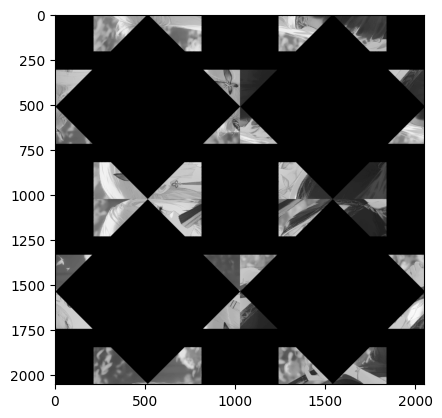

In [9]:
img = mpimg.imread("senheScramble.jpg")
plt.imshow(img, cmap="gray")
print(img.shape)